<a href="https://colab.research.google.com/github/nanpolend/machine-learning/blob/master/%E5%AE%8C%E5%85%A8%E9%80%A3%E6%8E%A5%E5%B1%A4_Gemini%E4%BF%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+-------+
                                    |  Data  |
                                    +-------+
                                        |
                                        v
                                +---------------+
                                | Data Cleaning |
                                +---------------+
                                        |
                                        v
                             +--------------------+
                             |  Feature Scaling  |
                             +--------------------+
                                        |
                                        v
                                 +------------+
                                 |   Model   |
                                 +------------+
                                /      |      \
                           /        |        \
                      /           |           \
               +-----------+  +-----------+  +-----------+
               |  Input   |->|  Hidden   |->|  Output   |
               +-----------+  +-----------+  +-----------+

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


w:-0.1008, b:1.6386


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36913 (\N{CJK UNIFIED IDEOGRAPH-9031}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  fig.canvas

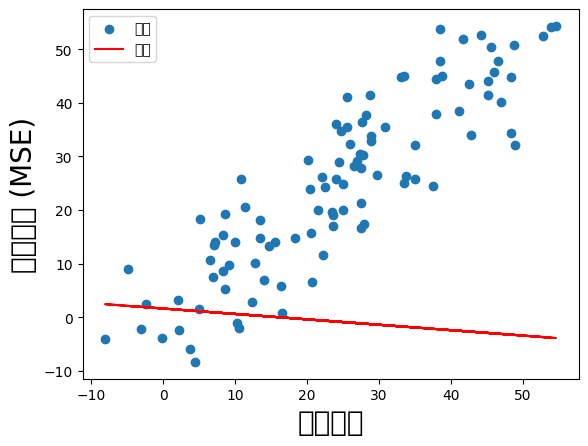

In [1]:
# -*- coding: utf-8 -*-
"""
建立時間：2023年3月11日 01:31:09

作者：nanpo
"""
import numpy as np
import tensorflow as tf

# 1. 產生隨機數據
# 設定數據點數量
n = 100
# 使用 np.linspace 產生 0 到 50 之間 n 個等距的值，分別賦予 x 和 y
x = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)
# 為 x 和 y 的每個元素加上 -10 到 10 之間的隨機雜訊，模擬真實數據的噪聲
x += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

# 2. 定義模型
# 建立一個 Dense 層，作為模型的第一層，神經元數量為 1，輸入形狀為 [1] (單一值)
layer1 = tf.keras.layers.Dense(units=1, input_shape=[1])
# 使用 Sequential 建立一個線性堆疊模型，此模型只包含 layer1
model = tf.keras.Sequential([layer1])
# 設定模型的損失函數為均方誤差 (MSE)，優化器為 Adam
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

# 3. 訓練模型
# 使用產生的數據 (x 和 y) 訓練模型，epochs=500 表示訓練過程迭代 500 次，verbose=False 表示訓練過程中不輸出訊息
history = model.fit(x, y, epochs=500, verbose=False)

# 4. 輸出學習到的權重和偏差
# 獲取 layer1 的權重，並賦予 w
w = layer1.get_weights()[0][0][0]
# 獲取 layer1 的偏差，並賦予 b
b = layer1.get_weights()[1][0]
# 輸出權重 (w) 和偏差 (b) 的值，格式化為四位小數
print(f"w:{w:.4f}, b:{b:.4f}")

# 5. 繪製數據和模型預測結果
import matplotlib.pyplot as plt
# 使用 scatter 繪製原始數據點 (x 和 y) 的散點圖
plt.scatter(x, y, label='數據')
# 使用 plot 繪製模型的預測結果，以紅色線條表示，預測值使用學習到的權重 (w) 和偏差 (b) 計算
plt.plot(x, x * w + b, 'r-', label='預測')
# 顯示圖例，用於識別數據點和預測線
plt.legend()
# 設定 x 軸標籤
plt.xlabel('訓練週期', fontsize=20)
# 設定 y 軸標籤
plt.ylabel('損失函數 (MSE)', fontsize=20)
# 顯示圖表
plt.show()